### Dataset Loading

##### Importing pandas for reading the csv file

In [1]:
# importing pandas library
import pandas as pd

##### Loading dataset

In [2]:
# using pandas for importing the dataset and assigning it to a dataframe "df".
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


### (Exploratory Data Analysis) EDA

In [3]:
# Checking for missing values
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'low risk'), Text(1, 0, 'mid risk'), Text(2, 0, 'high risk')])

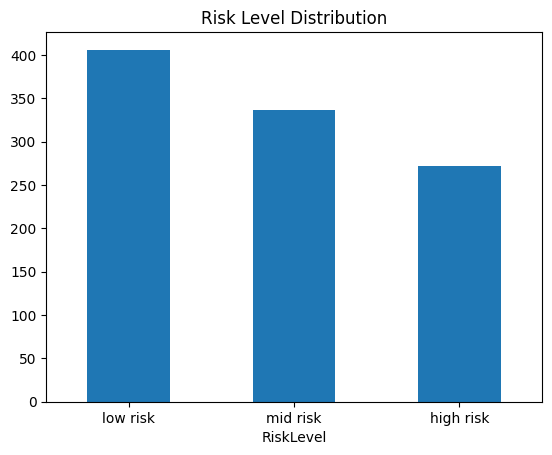

In [5]:
import matplotlib.pyplot as plt
class_value = df['RiskLevel'].value_counts()
print(class_value)
class_value.plot(kind='bar', title='Risk Level Distribution')
plt.xticks(rotation=0)

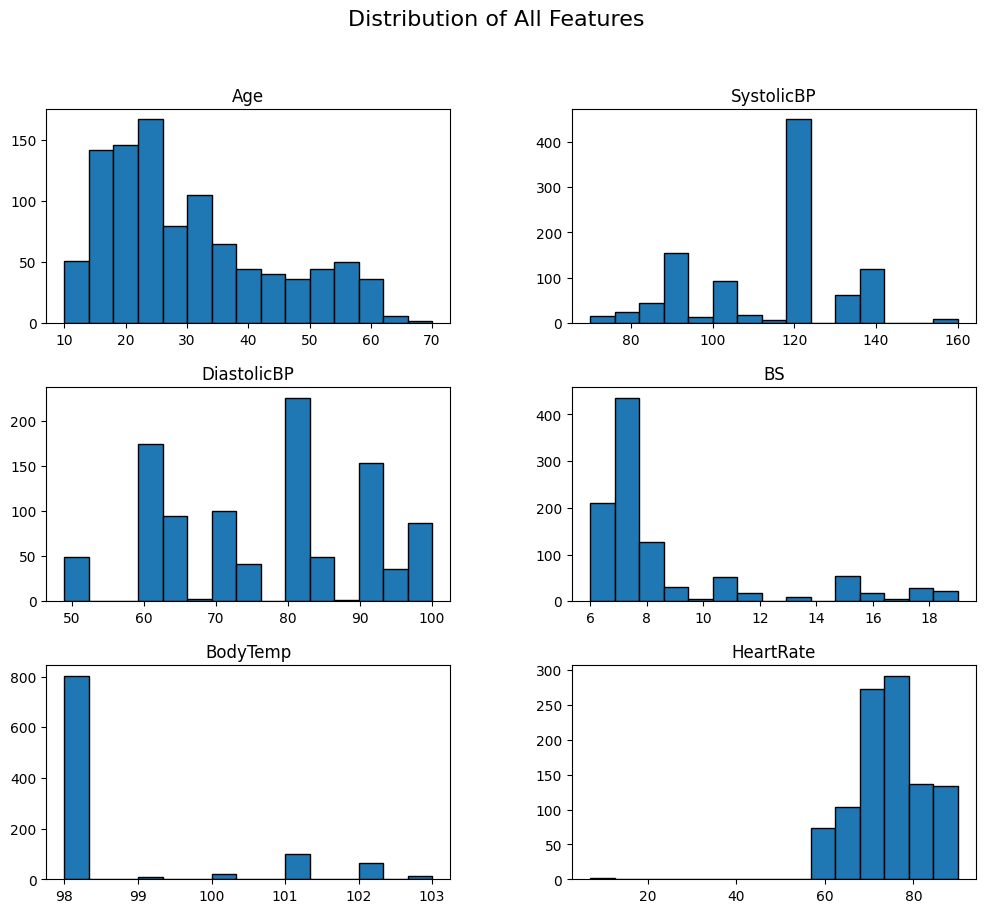

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=15, edgecolor='black', grid=False)

plt.suptitle('Distribution of All Features', fontsize=16)
plt.show()

### Pre-processing

##### target mapping to numbers

In [7]:
# mapping target variable to numerical values
mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['MappedTarget'] = df['RiskLevel'].map(mapping)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,MappedTarget
0,25,130,80,15.0,98.0,86,high risk,2
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,2
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,2
1010,55,120,90,18.0,98.0,60,high risk,2
1011,35,85,60,19.0,98.0,86,high risk,2
1012,43,120,90,18.0,98.0,70,high risk,2


##### Defining features and target

In [8]:
# defining feature and target variables.
X = df.drop(columns=['RiskLevel', 'MappedTarget'])
y = df['MappedTarget']

##### Data Splitting into train and test data

In [9]:
# importing train_test_split from sklearn.model_selection for splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [11]:
# imporing LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression(max_iter=1000, C=20, class_weight='balanced')
LRModel.fit(X_train_scaled, y_train)
y_pred_lr = LRModel.predict(X_test_scaled)
print("Logistic Regression Model trained successfully.")

Logistic Regression Model trained successfully.


In [12]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
RFmodel.fit(X_train_scaled, y_train)
y_pred_rf = RFmodel.predict(X_test_scaled)
print("Random Forest Model trained successfully.")


Random Forest Model trained successfully.


In [13]:
from sklearn.svm import SVC
SVMModel = SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', probability=True, random_state=42)
SVMModel.fit(X_train_scaled, y_train)
y_pred_svm = SVMModel.predict(X_test_scaled)
print("Support Vector Classifier Model trained successfully.")

Support Vector Classifier Model trained successfully.


### Model Evaluation

##### Importing Libraries needed for evaluation

In [14]:
# importing accuracy_score and classification_report from sklearn.metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

##### Evaluation for Logistic Regression

In [34]:
lr_train_accuracy = accuracy_score(y_train, LRModel.predict(X_train_scaled))
print(f"Training Accuracy: {lr_train_accuracy:.2f}")
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Testing Accuracy: {lr_test_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.62
Testing Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66        81
           1       0.48      0.43      0.45        67
           2       0.76      0.85      0.80        55

    accuracy                           0.64       203
   macro avg       0.63      0.65      0.64       203
weighted avg       0.63      0.64      0.63       203



##### Evaluation for Random Forest Classifier

In [33]:
rf_train_accuracy = accuracy_score(y_train, RFmodel.predict(X_train_scaled))
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2f}")
rf_test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Testing Accuracy: {rf_test_accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Training Accuracy: 0.90
Random Forest Testing Accuracy: 0.85
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        81
           1       0.81      0.76      0.78        67
           2       0.90      0.95      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203



##### Evaluation for Support Vector Classifier

In [32]:
svc_train_accuracy = accuracy_score(y_train, SVMModel.predict(X_train_scaled))
print(f"SVM Training Accuracy: {svc_train_accuracy:.2f}")
svc_test_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Testing Accuracy: {svc_test_accuracy:.2f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Training Accuracy: 0.74
SVM Testing Accuracy: 0.71
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        81
           1       0.65      0.45      0.53        67
           2       0.82      0.93      0.87        55

    accuracy                           0.71       203
   macro avg       0.72      0.72      0.71       203
weighted avg       0.71      0.71      0.70       203



##### Confusion Matrices for all models

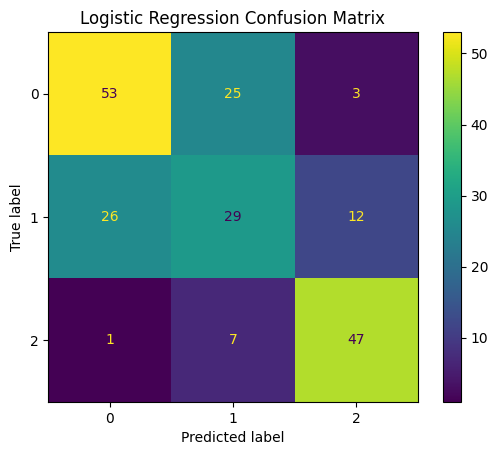

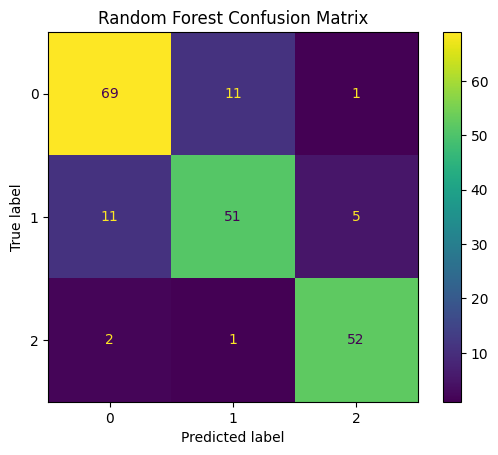

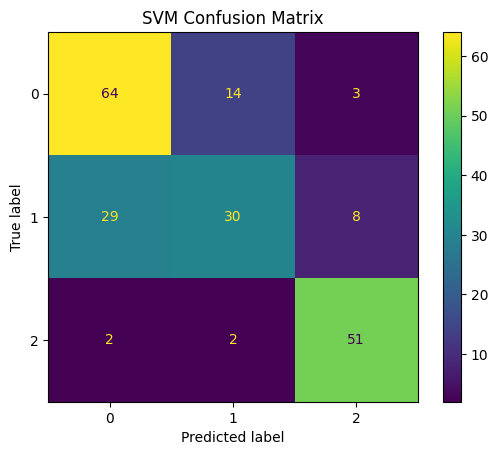

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title('Logistic Regression Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('Random Forest Confusion Matrix')
plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title('SVM Confusion Matrix')
plt.show()

### Prediction using the trained models

In [ ]:
reverse_mapping = {0: 'low risk', 1: 'mid risk', 2: 'high risk'}

print("\n--- Enter Patient Details for Prediction ---")

try:
    # 2. Take input from the user
    # We use float() to handle both integers and decimal numbers
    age = float(input("Enter Age: "))
    systolic_bp = float(input("Enter Systolic Blood Pressure (e.g., 120): "))
    diastolic_bp = float(input("Enter Diastolic Blood Pressure (e.g., 80): "))
    bs = float(input("Enter Blood Sugar (BS) level (e.g., 7.5): "))
    body_temp = float(input("Enter Body Temperature (e.g., 98.6): "))
    heart_rate = float(input("Enter Heart Rate (e.g., 72): "))

    # 3. Create a DataFrame with the inputs
    # The column names MUST match the names in your training data (X) exactly.
    user_input_data = pd.DataFrame([[age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate]],
                                   columns=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])

    print("\nProcessing Input Data...")

    # 4. Scale the data
    # We use the SAME scaler object created during the training phase
    user_input_scaled = scaler.transform(user_input_data)

    # 5. Make Predictions
    lr_pred = LRModel.predict(user_input_scaled)[0]
    rf_pred = RFmodel.predict(user_input_scaled)[0]
    svm_pred = SVMModel.predict(user_input_scaled)[0]

    # 6. Display Results
    print("-" * 40)
    print(f"Logistic Regression Prediction: {reverse_mapping[lr_pred]}")
    print(f"Random Forest Prediction:       {reverse_mapping[rf_pred]}")
    print(f"SVM Prediction:                 {reverse_mapping[svm_pred]}")
    print("-" * 40)

except ValueError:
    print("\nError: Please enter valid numerical values for all fields.")
except Exception as e:
    print(f"\nAn error occurred: {e}")


--- Enter Patient Details for Prediction ---

Processing Input Data...
----------------------------------------
Logistic Regression Prediction: high risk
Random Forest Prediction:       high risk
SVM Prediction:                 high risk
----------------------------------------
